# 서울시 두드림길 데이터 분석

In [9]:
import pandas as pd
import numpy as np
import pyproj

In [3]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [4]:
# 폰트가 선명하게 보일 수 있도록 레티나 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
df_Dodream = pd.read_csv("서울 두드림길 정보.csv",encoding="cp949")
df_Dodream

,코스 카테고리,코스 카테고리명,강북강남구분코드,강북강남구분,자치구,거리,소요시간,코스레벨,추천수,연계지하철,...,설명,PDF파일경로,코스명,작성시간,세부코스,포인트순번,포인트명칭,X 좌표,Y 좌표,포인트 설명
0,3000,근교산자락길,1,강남,관악구,1.3km,30분,1,0,2호선,...,관악구 관악산 내에 위치한 자락길로 전체구간이 완만하여 누구나 이용가능한 노선으로 ...,http://gil.seoul.go.kr/view/course/2014/06/17/,관악산 자락길(무장애숲길),2014-06-17 20:21:52.0,제2광장 자락길(무장애숲길)입구~책읽는 쉼터~잣나무 쉼터~바위쉼터~전망 쉼터~도토...,1475,서울대학교 버스정류장,195385.483302,440835.702858,"서울대학교 버스정류장(21-127) 간선 501, 506, 지선 6515, 551..."
1,3000,근교산자락길,1,강남,관악구,1.3km,30분,1,0,2호선,...,관악구 관악산 내에 위치한 자락길로 전체구간이 완만하여 누구나 이용가능한 노선으로 ...,http://gil.seoul.go.kr/view/course/2014/06/17/,관악산 자락길(무장애숲길),2014-06-17 20:21:52.0,제2광장 자락길(무장애숲길)입구~책읽는 쉼터~잣나무 쉼터~바위쉼터~전망 쉼터~도토...,1473,도토리 쉼터,195334.581070,439514.214414,도토리 쉼터
2,3000,근교산자락길,1,강남,관악구,1.3km,30분,1,0,2호선,...,관악구 관악산 내에 위치한 자락길로 전체구간이 완만하여 누구나 이용가능한 노선으로 ...,http://gil.seoul.go.kr/view/course/2014/06/17/,관악산 자락길(무장애숲길),2014-06-17 20:21:52.0,제2광장 자락길(무장애숲길)입구~책읽는 쉼터~잣나무 쉼터~바위쉼터~전망 쉼터~도토...,1472,전망 쉼터,195406.657711,439393.840679,전망 쉼터
3,3000,근교산자락길,1,강남,관악구,1.3km,30분,1,0,2호선,...,관악구 관악산 내에 위치한 자락길로 전체구간이 완만하여 누구나 이용가능한 노선으로 ...,http://gil.seoul.go.kr/view/course/2014/06/17/,관악산 자락길(무장애숲길),2014-06-17 20:21:52.0,제2광장 자락길(무장애숲길)입구~책읽는 쉼터~잣나무 쉼터~바위쉼터~전망 쉼터~도토...,1469,책읽는 쉼터,195233.775863,439603.680075,책읽는 쉼터
4,3000,근교산자락길,1,강남,관악구,1.3km,30분,1,0,2호선,...,관악구 관악산 내에 위치한 자락길로 전체구간이 완만하여 누구나 이용가능한 노선으로 ...,http://gil.seoul.go.kr/view/course/2014/06/17/,관악산 자락길(무장애숲길),2014-06-17 20:21:52.0,제2광장 자락길(무장애숲길)입구~책읽는 쉼터~잣나무 쉼터~바위쉼터~전망 쉼터~도토...,1468,제2광장 자락길(무장애숲길)입구,195190.403054,439598.519376,제2광장 자락길(무장애숲길)입구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2000,서울둘레길,2,강북,"노원구,도봉구",14.3km,6시간 30분,3,0,"1호선,4호선,6호선,7호선",...,서울 둘레길의 1코스로서 수락산과 불암산을 통과하는 노선이다. 서울의 대표적인 수락...,http://gil.seoul.go.kr/view/course/2015/04/13/...,1코스-수락?불암산코스,2013-09-02 14:20:30.0,도봉산역~서울창포원~덕릉고개~넓은마당~경수사~성관사~넓적바위~학도암~태릉~화랑대역,1,"지하철 1,7호선 도봉산역",204113.489311,465475.962367,2번 출구
1450,2000,서울둘레길,2,강북,"노원구,도봉구",14.3km,6시간 30분,3,0,"1호선,4호선,6호선,7호선",...,서울 둘레길의 1코스로서 수락산과 불암산을 통과하는 노선이다. 서울의 대표적인 수락...,http://gil.seoul.go.kr/view/course/2015/04/13/...,1코스-수락?불암산코스,2013-09-02 14:20:30.0,도봉산역~서울창포원~덕릉고개~넓은마당~경수사~성관사~넓적바위~학도암~태릉~화랑대역,6,성관사,207067.922700,462587.322500,성관사
1451,2000,서울둘레길,2,강북,"노원구,도봉구",14.3km,6시간 30분,3,0,"1호선,4호선,6호선,7호선",...,서울 둘레길의 1코스로서 수락산과 불암산을 통과하는 노선이다. 서울의 대표적인 수락...,http://gil.seoul.go.kr/view/course/2015/04/13/...,1코스-수락?불암산코스,2013-09-02 14:20:30.0,도봉산역~서울창포원~덕릉고개~넓은마당~경수사~성관사~넓적바위~학도암~태릉~화랑대역,2,서울창포원,204239.755700,465532.426400,"서울창포원은 총면적 52,417㎡에 꽃창포를 비롯한 붓꽃을 주제로 한 서울시의 생태..."
1452,2000,서울둘레길,2,강북,"노원구,도봉구",14.3km,6시간 30분,3,0,"1호선,4호선,6호선,7호선",...,서울 둘레길의 1코스로서 수락산과 불암산을 통과하는 노선이다. 서울의 대표적인 수락...,http://gil.seoul.go.kr/view/course/2015/04/13/...,1코스-수락?불암산코스,2013-09-02 14:20:30.0,도봉산역~서울창포원~덕릉고개~넓은마당~경수사~성관사~넓적바위~학도암~태릉~화랑대역,3,덕릉고개,208152.469800,464185.252300,노원구의 수락산과 불암산을 연결해주는 곳으로 생태육교를 설치하여 사람뿐만이 아닌 동...


In [6]:
# X 좌표, Y 좌표 데이터만 추출
df_Dodream_coord = df_Dodream[["X 좌표", "Y 좌표"]]
df_Dodream_coord

,X 좌표,Y 좌표
0,195385.483302,440835.702858
1,195334.581070,439514.214414
2,195406.657711,439393.840679
3,195233.775863,439603.680075
4,195190.403054,439598.519376
...,...,...
1449,204113.489311,465475.962367
1450,207067.922700,462587.322500
1451,204239.755700,465532.426400
1452,208152.469800,464185.252300


In [10]:
# X, Y 좌표를 위경도 데이터로 변환하는 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [11]:
# DataFrame -> NumPy Array 변환
coord = np.array(df_Dodream_coord)
coord

array([[195385.48330179, 440835.70285806],
       [195334.58107032, 439514.21441383],
       [195406.65771083, 439393.84067896],
       ...,
       [204239.7557    , 465532.4264    ],
       [208152.4698    , 464185.2523    ],
       [207359.0804    , 463077.0889    ]])

In [12]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

C:\Users\sw000\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sw000\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sw000\AppData\Local\Temp\ipykernel_22872\2093212355.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyp

array([[126.94573492,  37.4696861 ],
       [126.94516799,  37.45777918],
       [126.94598339,  37.45669497],
       ...,
       [127.04596696,  37.69220254],
       [127.09031431,  37.68003877],
       [127.08130926,  37.67006119]])

In [13]:
result.shape

(1454, 2)

In [14]:
# 두드림길 데이터에 경도, 위도 컬럼 추가
df_Dodream['경도'], df_Dodream['위도'] = result[:,0], result[:,1]
df_Dodream.columns

Index(['코스 카테고리', '코스 카테고리명', '강북강남구분코드', '강북강남구분', '자치구', '거리', '소요시간',
       '코스레벨', '추천수', '연계지하철', '교통편', '설명', 'PDF파일경로', '코스명', '작성시간', '세부코스',
       '포인트순번', '포인트명칭', 'X 좌표', 'Y 좌표', '포인트 설명', '경도', '위도'],
      dtype='object')

In [15]:
# 범위 제한 (광진구 지역범위)
df_Dodream_kj = df_Dodream[(df_Dodream["경도"] > 127.058651) & (df_Dodream["경도"] < 127.113715) 
                           & (df_Dodream["위도"] > 37.527051) & (df_Dodream["위도"] < 37.5717)]
df_Dodream_kj

,코스 카테고리,코스 카테고리명,강북강남구분코드,강북강남구분,자치구,거리,소요시간,코스레벨,추천수,연계지하철,...,코스명,작성시간,세부코스,포인트순번,포인트명칭,X 좌표,Y 좌표,포인트 설명,경도,위도
173,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1320,고구려대장간마을 버스정류장,210158.168720,451572.818459,"버스정류장 22-007 일반 1,1-1,1-2,11,15,23 직행 11,1660,100",127.112877,37.566384
174,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1319,강변역 지하철 2호선,208394.847267,448357.369501,강변역 지하철 2호선,127.092882,37.537430
175,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1318,쉐라톤워커힐호텔 인근,210009.735785,450745.948329,쉐라톤워커힐호텔 인근,127.111186,37.558935
176,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1317,"올림픽대교, 강변북로 인근",209195.922690,449013.580567,"올림픽대교, 강변북로 인근",127.101954,37.543335
177,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1316,동서울터미널 인근,208436.586105,448200.639562,동서울터미널 인근,127.093352,37.536018
178,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1315,"뚝섬유원지, 잠실대교 인근",207176.433295,447487.774697,"뚝섬유원지, 잠실대교 인근",127.079088,37.529606
179,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1314,뚝섬유원지 인근,205855.575177,447889.644027,뚝섬유원지 인근,127.064148,37.533236
180,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1313,뚝섬유원지,206136.815552,447741.106184,뚝섬유원지,127.067328,37.531896
181,5000,한강지천길/계절길,2,강북,"광진구,성동구",12.84Km,4시간,1,0,"3호선,7호선,중앙선",...,성동광진구한강길,2013-09-27 17:07:16.0,"옥수역 인근~서울숲 인근~영동대교 인근~뚝섬유원지 인근~뚝섬유원지, 잠실대교 인근~...",1312,뚝섬유원지역 지하철 7호선,205874.359587,447959.384297,뚝섬유원지역 지하철 7호선,127.064361,37.533864
182,1000,생태문화길,2,강북,"광진구,성동구",1.89km,2시간,1,0,"5호선,7호선",...,어린이대공원 산책길,2013-09-27 16:56:46.0,모험의 나라 놀이터~음악분수~전래동화마을~물놀이장,874,어린이대공원 후문,207386.291200,450095.853100,어린이대공원 후문,127.081488,37.553103


## 데이터 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

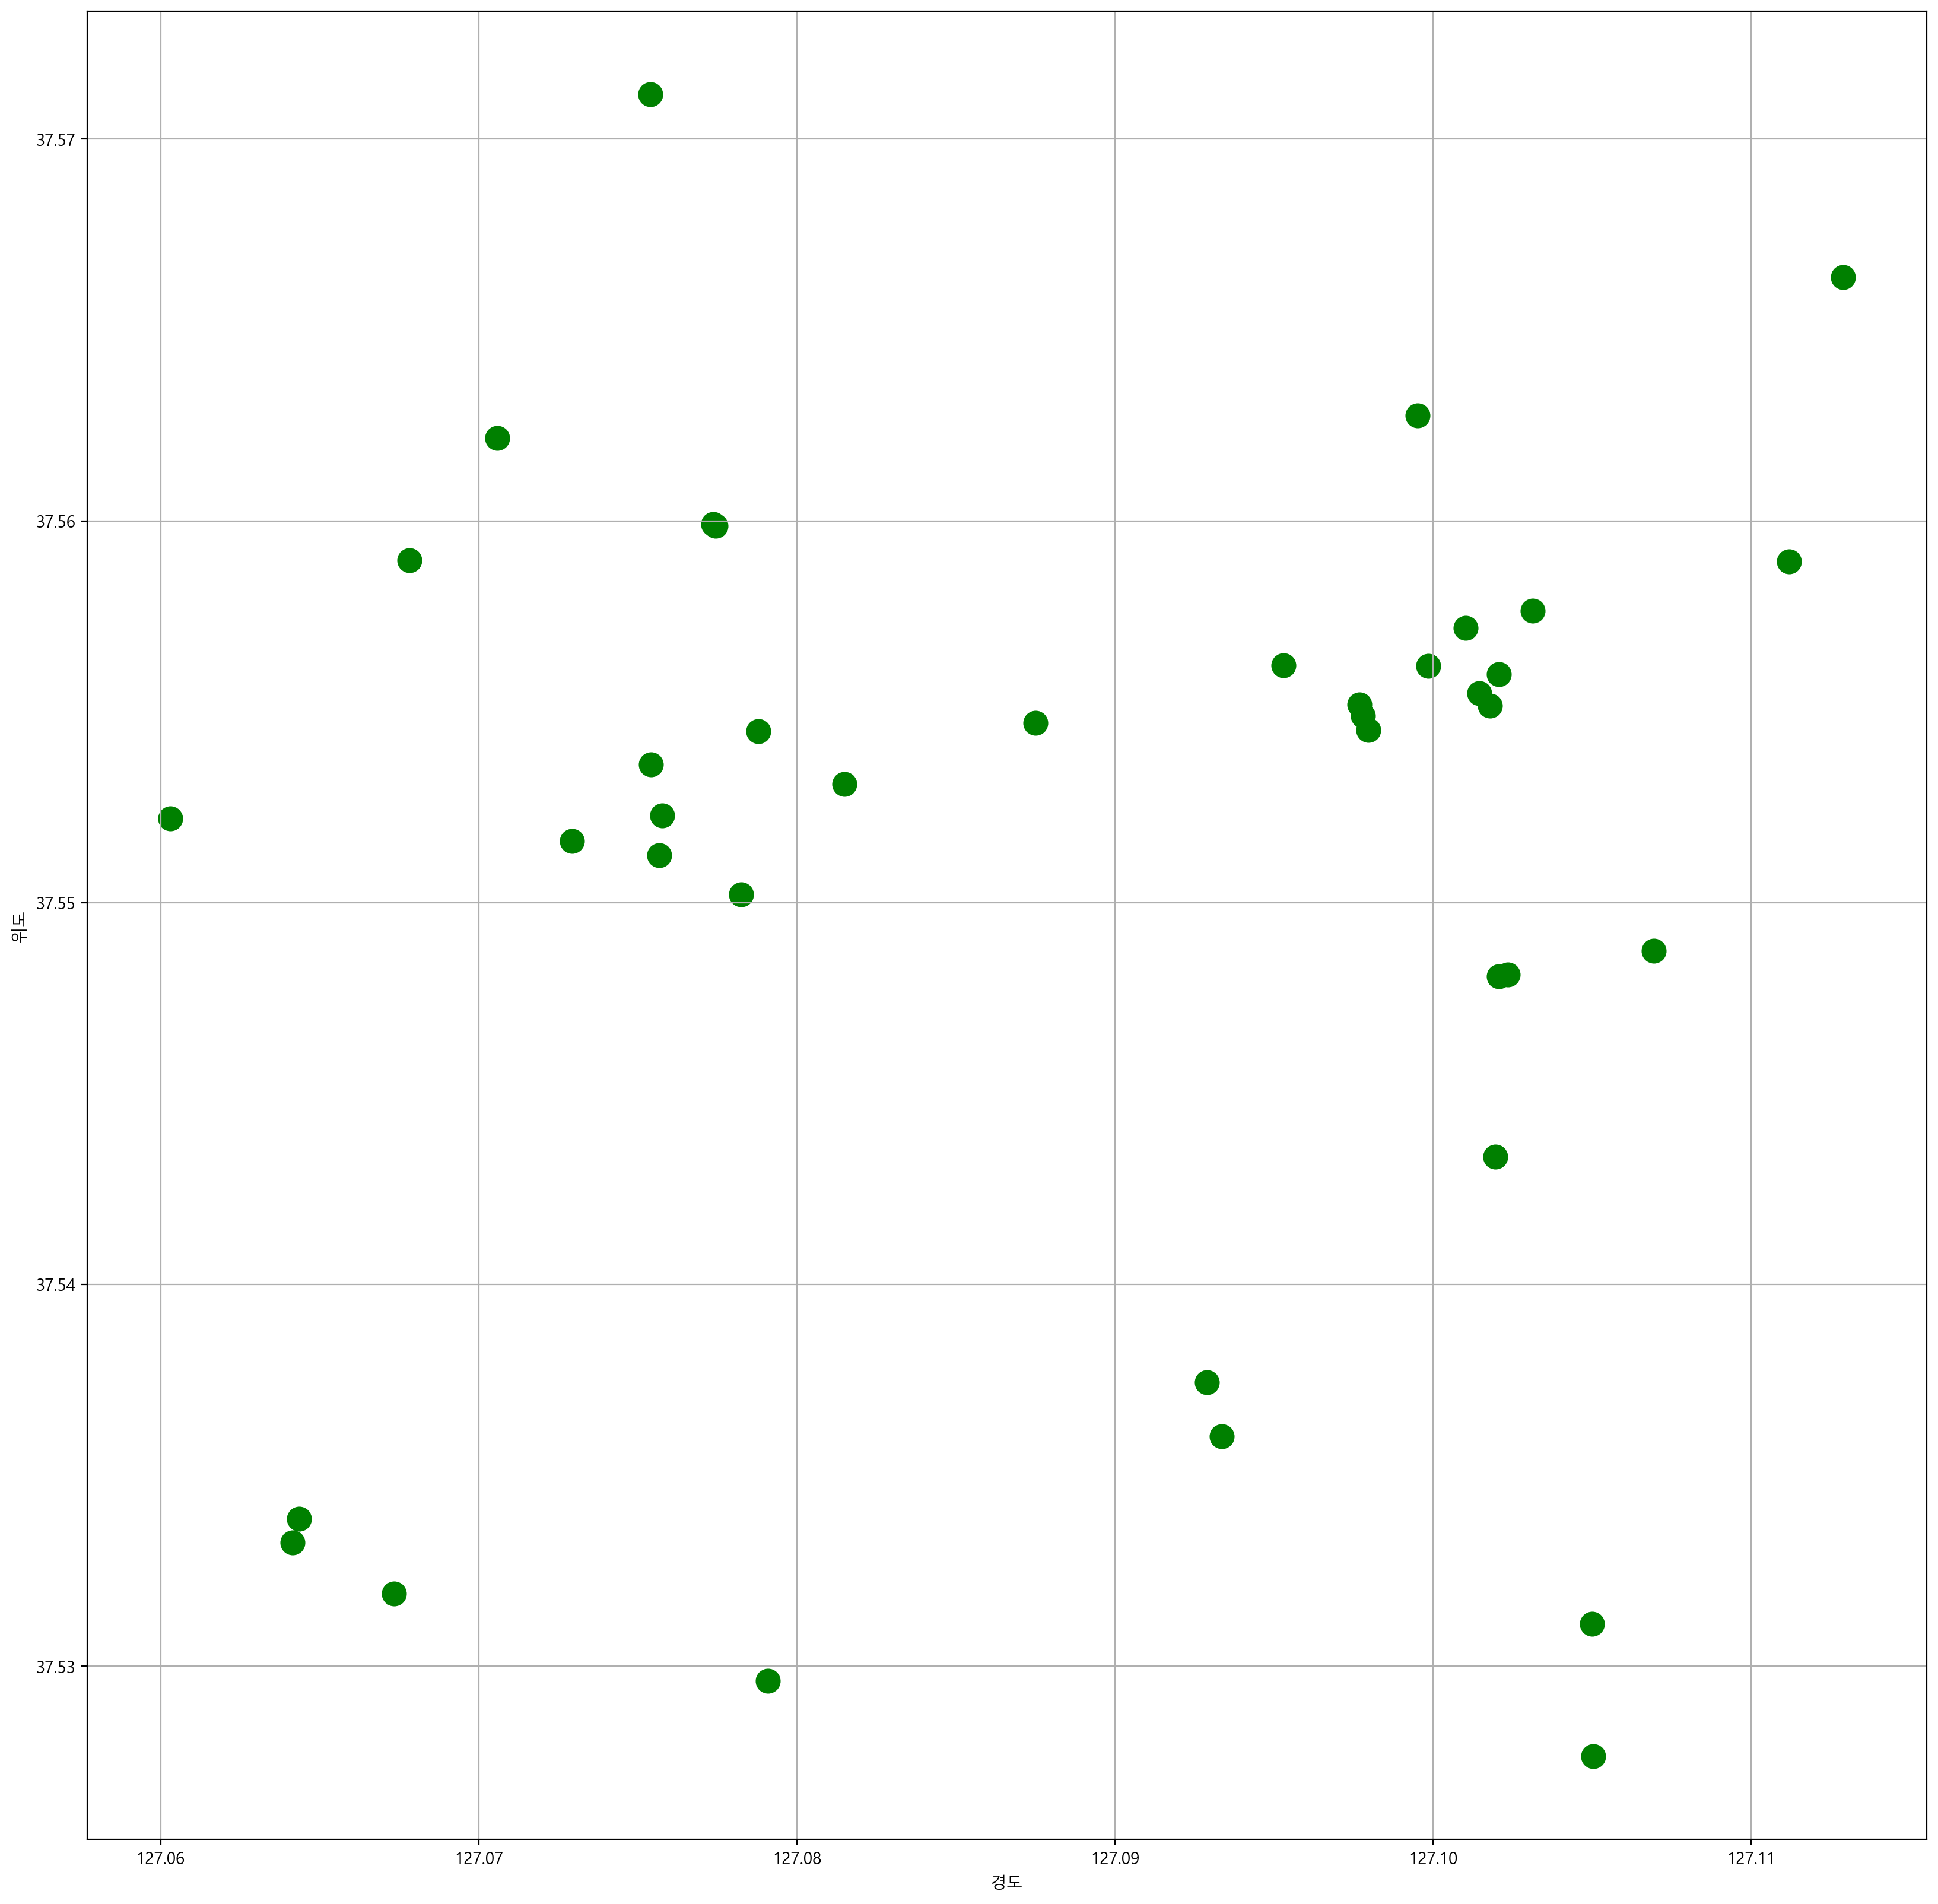

In [16]:
df_Dodream_kj[["경도", "위도"]].plot.scatter(x="경도", y="위도", figsize = (20,20), grid=True, s = 200, color = 'green')

In [17]:
import folium

map = folium.Map(location=[df_Dodream_kj["위도"].mean(), df_Dodream_kj["경도"].mean()],
          zoom_start=12) # zoom_start=1 이면 세계지도로 시작
                         # folium.Map에서 위도,경도 설정은 location[위도, 경도] 순으로

for n in df_Dodream_kj.index:
    name = df_Dodream_kj.loc[n, "코스명"]
    address = df_Dodream_kj.loc[n, "코스 카테고리명"]
    popup = f"{name}-{address}" 
    # 문자열 포매팅을 사용해서 
    #name과 address를 형식에 맞게 저장
    location = [df_Dodream_kj.loc[n, "위도"], df_Dodream_kj.loc[n, "경도"]]
    
    folium.Marker(
        location = location,
        popup = popup
    ).add_to(map)
map